# Weather Data Temperature Analysis

This notebook extracts weather data from files stored in COS and then performs some statistical analysis of the data using matplotlib to print out history diagram, boxplot diagram and time series diagram focusing on temperatures. 

In [1]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Weather Observation Data Import

The following function read the file containing the weather data and peforms a preliminary inspection of the data.

In [2]:
# Insert code to import the data asset 'weather-observations.csv' here using IBM Watson Studio

,class,clds,day_ind,expire_time_gmt,valid_time_gmt,date,obs_name,pressure,temp,uv_desc,wdir,wdir_cardinal,wspd,wx_phrase
0,observation,CLR,D,1557755400,1557748200,2019-05-13,Hamburg/Finkenwerder,1036.14,14,Moderate,300.0,WNW,22,Fair
1,observation,CLR,D,1557751800,1557744600,2019-05-13,Hamburg/Finkenwerder,1036.14,13,Moderate,290.0,WNW,26,Fair
2,observation,CLR,D,1557748200,1557741000,2019-05-13,Hamburg/Finkenwerder,1037.14,13,Moderate,310.0,NW,19,Fair
3,observation,CLR,D,1557744600,1557737400,2019-05-13,Hamburg/Finkenwerder,1037.14,12,Moderate,300.0,WNW,20,Fair
4,observation,CLR,D,1557741000,1557733800,2019-05-13,Hamburg/Finkenwerder,1037.14,10,Low,310.0,NW,15,Fair


## Weather Observation Data Analysis 

Analysis of the data using typical pandas functions for generating descriptive statistics, investigating the type of each column and determining if there are any missing data in the data set. 

In [3]:
df.describe()

,expire_time_gmt,valid_time_gmt,pressure,temp,wdir,wspd
count,3.830000e+02,3.830000e+02,383.000000,383.000000,366.000000,383.000000
mean,1.557070e+09,1.557062e+09,1013.191932,8.736292,255.710383,16.109661
std,3.952679e+05,3.952679e+05,9.254154,3.446816,68.733460,7.791691
min,1.556450e+09,1.556443e+09,994.170000,-1.000000,20.000000,0.000000
25%,1.556724e+09,1.556717e+09,1006.160000,7.000000,240.000000,9.000000
50%,1.557068e+09,1.557061e+09,1014.160000,9.000000,270.000000,15.000000
75%,1.557412e+09,1.557404e+09,1018.150000,11.000000,300.000000,22.000000
max,1.557755e+09,1.557748e+09,1037.140000,18.000000,360.000000,33.000000


In [4]:
df.dtypes

class               object
clds                object
day_ind             object
expire_time_gmt      int64
valid_time_gmt       int64
date                object
obs_name            object
pressure           float64
temp                 int64
uv_desc             object
wdir               float64
wdir_cardinal       object
wspd                 int64
wx_phrase           object
dtype: object

In [5]:
df.isnull().sum()

class               0
clds                0
day_ind             0
expire_time_gmt     0
valid_time_gmt      0
date                0
obs_name            0
pressure            0
temp                0
uv_desc             0
wdir               17
wdir_cardinal       0
wspd                0
wx_phrase           0
dtype: int64

## Location of Weather Observations

Short inspection of the locations of the weather data.

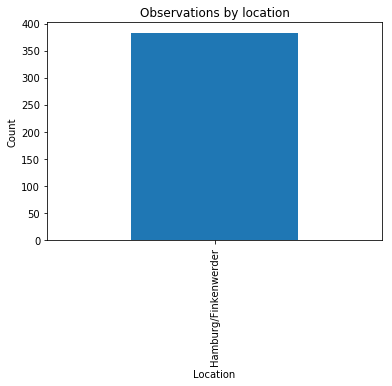

In [6]:
df_locations = df['obs_name'].value_counts()
df_locations.plot(kind='bar', title='Observations by location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

## Temperature Distribution Histograms

The next group of cells prepare the data for printing history diagrams using matplotlib and prints out the distribution of the day and night temperatures.

In [7]:
temperatures = df['temp'].values

In [8]:
day_temp = df["temp"][df["day_ind"] == 'D']
night_temp = df["temp"][df["day_ind"] == 'N']

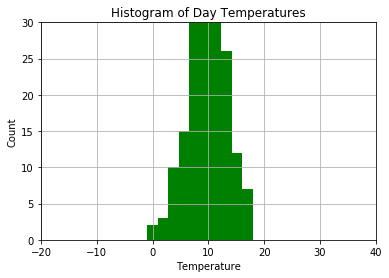

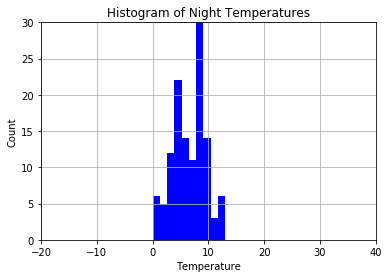

In [9]:
plt.hist(day_temp,label ='Day Temperatures', facecolor='g')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Day Temperatures')
plt.axis([-20, 40, 0, 30])
plt.xlim(-20,40)
plt.grid(True)
plt.show()
plt.hist(night_temp,label ='Night Temperatures', facecolor='b')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Night Temperatures')
plt.axis([-20, 40, 0, 30])
plt.xlim(-20,40)
plt.grid(True)
plt.show()

## Temperature Distribution Boxplot Diagrams

The next cells generate matplotlib box diagrams showing the mean value, the standard deviation, the outlier boundary and the outliers for the day and night temperatures.

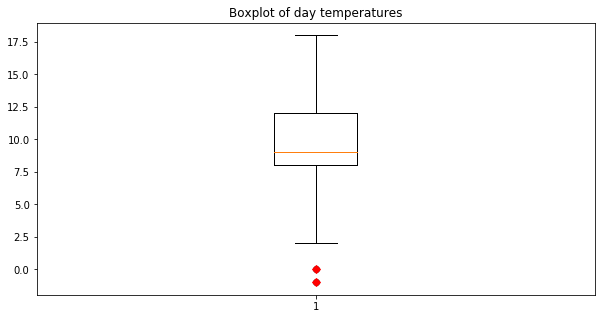

In [10]:
df["temp"][df["day_ind"] == 'D'].plot(kind = 'box', title = 'Boxplot of day temperatures', figsize=(10,5))
plt.boxplot(day_temp,0, 'rD')
plt.show()

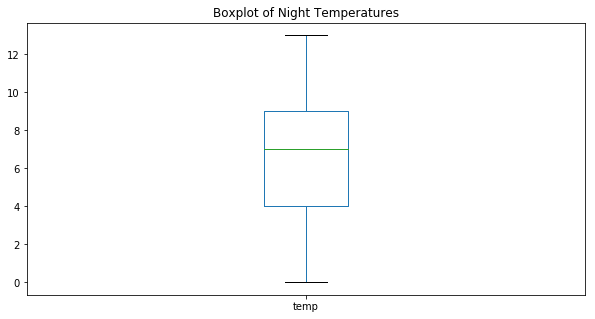

In [11]:
df["temp"][df["day_ind"] == 'N'].plot(kind = 'box', title = 'Boxplot of night temperatures', figsize=(10,5))
plt.title('Boxplot of Night Temperatures')
plt.show()

## Temperature Correlation Analysis 

The following scatter plot determines if there is any linerar correlation between weather temperature and pressure.

[]

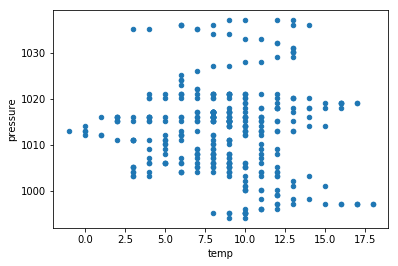

In [12]:
df.plot(kind='scatter',x="temp",y='pressure')
plt.plot()

## Aggregated Temperatures day by day

The next cells prepare the data for a matplotlib line plot. The plot function requires a sorted, aggregated data frame.

In [13]:
# Insert code to import the data asset 'weather-observation-temperatures.csv' here using IBM Watson Studio

,obs_name,obs_date,day_ind,mintemp,avgtemp,maxtemp
0,Hamburg/Finkenwerder,2019-04-28,D,8,8.9,13
1,Hamburg/Finkenwerder,2019-04-28,N,8,9.0,10
2,Hamburg/Finkenwerder,2019-04-29,D,8,11.7,17
3,Hamburg/Finkenwerder,2019-04-29,N,4,8.0,13
4,Hamburg/Finkenwerder,2019-04-30,D,4,11.9,17


In [14]:
df_sorted = df_data_1.sort_values('obs_date')

In [15]:
df_sorted.set_index('obs_date',inplace=True)

In [16]:
df_grouped_day = df_sorted[df_sorted["day_ind"] == 'D']
df_grouped_day.head(5)

,obs_name,day_ind,mintemp,avgtemp,maxtemp
obs_date,,,,,
2019-04-28,Hamburg/Finkenwerder,D,8,8.9,13
2019-04-29,Hamburg/Finkenwerder,D,8,11.7,17
2019-04-30,Hamburg/Finkenwerder,D,4,11.9,17
2019-05-01,Hamburg/Finkenwerder,D,9,9.6,11
2019-05-02,Hamburg/Finkenwerder,D,8,9.9,13


In [17]:
df_grouped_night = df_sorted[df_sorted["day_ind"] == 'N']
df_grouped_night.head(5)

,obs_name,day_ind,mintemp,avgtemp,maxtemp
obs_date,,,,,
2019-04-28,Hamburg/Finkenwerder,N,8,9.0,10
2019-04-29,Hamburg/Finkenwerder,N,4,8.0,13
2019-04-30,Hamburg/Finkenwerder,N,4,8.0,11
2019-05-01,Hamburg/Finkenwerder,N,8,8.6,9
2019-05-02,Hamburg/Finkenwerder,N,6,7.4,8


## Temperatures by Date Time Series

The next cells uses matplotlib line plot diagrams which are ideal to show time series. 

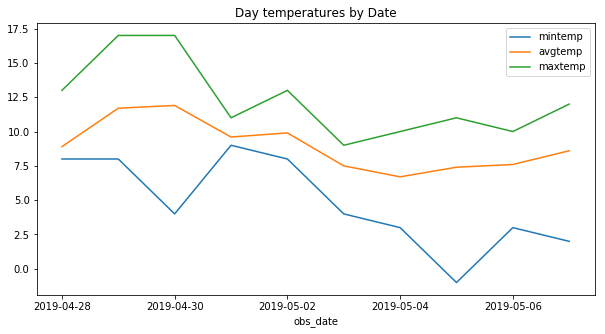

In [18]:
df_grouped_day.plot(kind = 'line', title = 'Day temperatures by Date', figsize=(10,5))

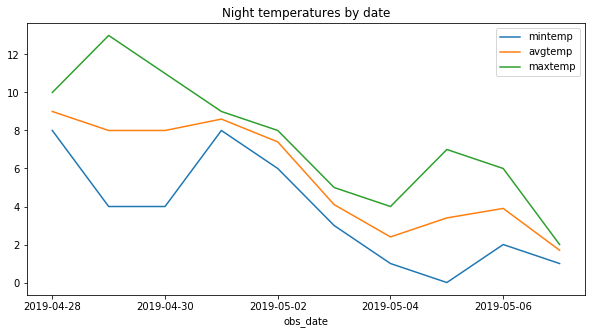

In [19]:
df_grouped_night.plot(kind = 'line', title = 'Night temperatures by date', figsize=(10,5))

Authored by Einar Karlsen, IBM Deutschland GmbH.